#Proyecto de aprendizaje supervisado
Equipo 6

## 01. Librerías y Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import keras 
import warnings
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_heart= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/heart.csv")
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 02. Valores nulos

In [ ]:
df_heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df_heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## 03. Valores cualitativos

Columna *gender*

In [ ]:
df_heart['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df_heart['Sex'].replace({"F":0,"M":1},inplace=True)
df_heart['Sex'].value_counts()

1    725
0    193
Name: Sex, dtype: int64

Columna *ChestPainType*

In [ ]:
df_heart['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
df_heart['ChestPainType'].replace({"ASY":0,"NAP":1,"ATA":2, "TA":3},inplace=True)
df_heart['ChestPainType'].value_counts()

0    496
1    203
2    173
3     46
Name: ChestPainType, dtype: int64

Columna *RestingECG*

In [ ]:
df_heart['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
df_heart['RestingECG'].replace({"Normal":0,"LVH":1,"ST":2},inplace=True)
df_heart['RestingECG'].value_counts()

0    552
1    188
2    178
Name: RestingECG, dtype: int64

Columna *ExerciseAngina*

In [ ]:
df_heart['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
df_heart["ExerciseAngina"].replace({"Y":1,"N":0},inplace=True)
df_heart['ExerciseAngina'].value_counts()

0    547
1    371
Name: ExerciseAngina, dtype: int64

Columna *ST_Slope*

In [ ]:
df_heart['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
df_heart['ST_Slope'].replace({"Flat":0,"Up":1, "Down":2},inplace=True)
df_heart['ST_Slope'].value_counts()

0    460
1    395
2     63
Name: ST_Slope, dtype: int64

In [ ]:
df_heart.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

##04. Distribución de las variables

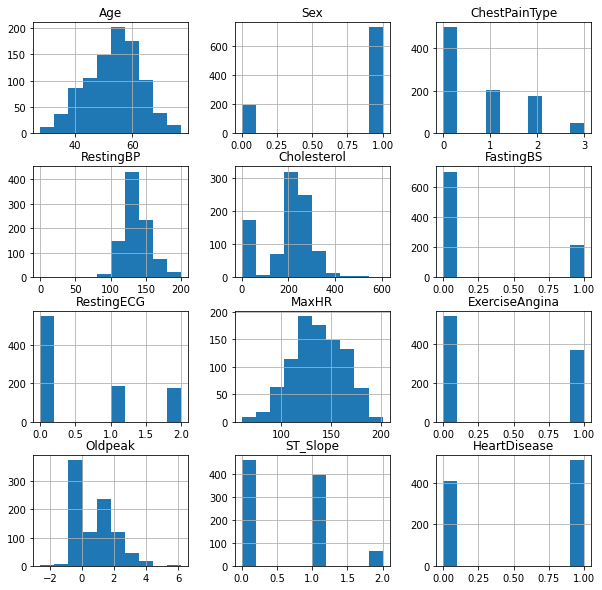

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df_heart.hist(ax=ax)
plt.show()

In [ ]:
#Número de observaciones en cada clase
df_heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
df_heart['HeartDisease'].unique()

array([0, 1])

##05. Análisis de Correlación

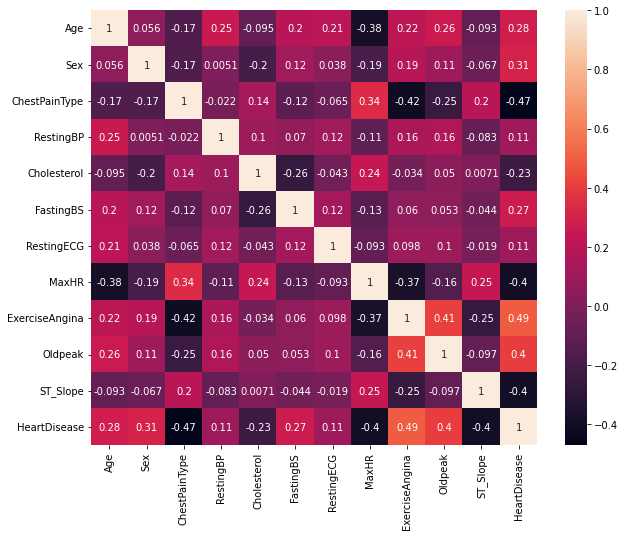

In [ ]:
fig = plt.figure(figsize=(10,8))
corrMatrix = df_heart.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 06. Selección de Variables


In [ ]:
X= df_heart.drop(["HeartDisease"],axis=1)
X.shape

(918, 11)

In [ ]:
y= df_heart["HeartDisease"]
y.shape

(918,)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X)
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train_pca= scaler.transform(X_train)
X_test_pca= scaler.transform(X_test)
X_train_pca=pca.transform(X_train_pca)
X_test_pca=pca.transform(X_test_pca)
print(X_train_pca.shape)
print(X_test_pca.shape)

(642, 2)
(276, 2)


In [ ]:
def plotResults(y_pred):
  fig, ax= plt.subplots()
  ax.scatter(X_train_pca[y_train==False,0],X_train_pca[y_train==False,1],c="blue",label="Class 0 Train")
  ax.scatter(X_train_pca[y_train==True,0],X_train_pca[y_train==True,1],c="red",label="Class 1 Train")
  ax.scatter(X_test_pca[y_pred==False,0],X_test_pca[y_pred==False,1],c="LightBlue",label="Class 0 Test")
  ax.scatter(X_test_pca[y_pred==True,0],X_test_pca[y_pred==True,1],c="orange",label="Class 1 Test")
  plt.legend()
  plt.show()

## 07. Aprendizaje supervisado

### 07.1 Árbol de decisión (*Adrián Landaverde Nava*)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predDT = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predDT))
print(classification_report(y_test,y_predDT))

[[ 95  14]
 [ 40 127]]
              precision    recall  f1-score   support

           0       0.70      0.87      0.78       109
           1       0.90      0.76      0.82       167

    accuracy                           0.80       276
   macro avg       0.80      0.82      0.80       276
weighted avg       0.82      0.80      0.81       276



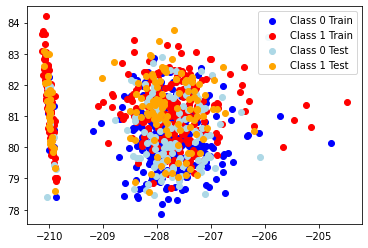

In [ ]:
plotResults(y_predDT)

### 07.2 Support Vector Machine (*Sabrina Nicole Rodríguez Salgado*)

*SVM simple*

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_predSVM = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predSVM))
print(classification_report(y_test,y_predSVM))

[[ 98  11]
 [ 26 141]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       109
           1       0.93      0.84      0.88       167

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



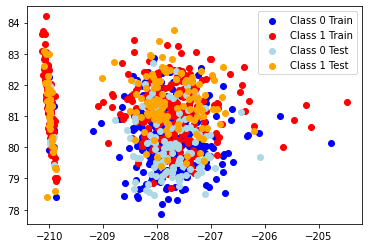

In [ ]:
plotResults(y_predSVM)

*SVM con kernels*

Kernel polinomial de grado 2

In [ ]:
#polinomial
svclassifier = SVC(kernel='poly', degree=2)
svclassifier.fit(X_train, y_train)
y_predPolinomial = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_predPolinomial))
print(classification_report(y_test, y_predPolinomial))

[[ 77  32]
 [ 43 124]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       109
           1       0.79      0.74      0.77       167

    accuracy                           0.73       276
   macro avg       0.72      0.72      0.72       276
weighted avg       0.73      0.73      0.73       276



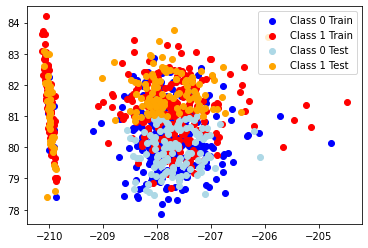

In [ ]:
plotResults(y_predPolinomial)

Kernel gaussiano

In [ ]:
#gaussiano
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_predGaussiano = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_predGaussiano))
print(classification_report(y_test, y_predGaussiano))

[[ 84  25]
 [ 53 114]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       109
           1       0.82      0.68      0.75       167

    accuracy                           0.72       276
   macro avg       0.72      0.73      0.71       276
weighted avg       0.74      0.72      0.72       276



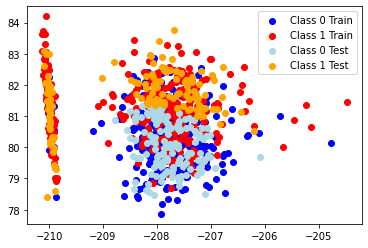

In [ ]:
plotResults(y_predGaussiano)

Kernel sigmoide

In [ ]:
#sigmoide
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_predSigmoid = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_predSigmoid))
print(classification_report(y_test, y_predSigmoid))

[[52 57]
 [74 93]]
              precision    recall  f1-score   support

           0       0.41      0.48      0.44       109
           1       0.62      0.56      0.59       167

    accuracy                           0.53       276
   macro avg       0.52      0.52      0.51       276
weighted avg       0.54      0.53      0.53       276



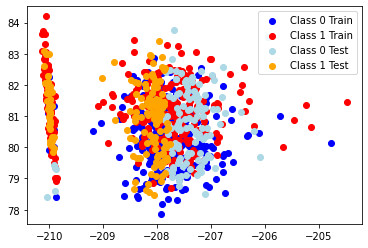

In [ ]:
plotResults(y_predSigmoid)

### 07.3 Redes Neuronales (*Naomi Padilla Mora*)

In [ ]:
training_epochs = 400 # Total number of training epochs 
learning_rate = 0.03 # The learning rate

In [ ]:
y_trainRN= y_train.to_frame().T
y_testRN= y_test.to_frame().T

In [ ]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_trainRN.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_testRN.shape))

x_train:	(642, 11)
y_train:	(1, 642)
x_test:		(276, 11)
y_test:		(1, 276)


In [ ]:

def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=11, kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(y_trainRN.T.shape[1], activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(
    X_train, y_trainRN.T,
    epochs= training_epochs,
    batch_size = 200, 
    validation_data = (X_test, y_testRN.T),
    verbose = 0
)

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 84.19%


In [ ]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_trainRN.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_testRN.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
21/21 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8489
loss=0.3507, accuracy: 84.8910%
Evaluating on testing set...
9/9 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8659
loss=0.3587, accuracy: 86.5942%


### 07.4 Regresión Logística (*Naomi Padilla Mora*)

In [ ]:
clf = LogisticRegression(random_state=0)
clf = clf.fit(X_train,y_train)
y_predRL = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_predRL))
print(classification_report(y_test,y_predRL))

[[ 97  12]
 [ 26 141]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       109
           1       0.92      0.84      0.88       167

    accuracy                           0.86       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276



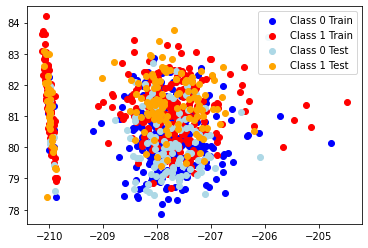

In [ ]:
plotResults(y_predRL)

### 07.5 Random Forest (*Sabrina Nicole Rodríguez Salgado*)

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predRF = clf.predict(X_test)
print(X_test.columns)
clf.feature_importances_


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


array([1.98560981e-02, 1.38251370e-02, 2.33246900e-01, 2.98974285e-03,
       5.30703950e-02, 9.35326851e-03, 2.43951529e-04, 5.11881887e-02,
       1.47415177e-01, 1.24128290e-01, 3.44682851e-01])

In [ ]:
print(confusion_matrix(y_test,y_predRF))
print(classification_report(y_test,y_predRF))

[[ 91  18]
 [ 14 153]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.89      0.92      0.91       167

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



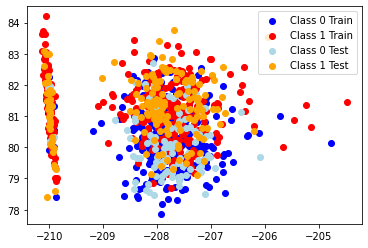

In [ ]:
plotResults(y_predRF)

### 07.6 K-Nearest Neighbours (*Adrián Landaverde Nava*)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_predKNN = classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

[[ 75  34]
 [ 42 125]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       109
           1       0.79      0.75      0.77       167

    accuracy                           0.72       276
   macro avg       0.71      0.72      0.72       276
weighted avg       0.73      0.72      0.73       276



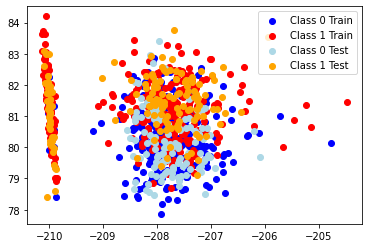

In [ ]:
plotResults(y_predKNN)